Uitleg van de cellen:

Cell 1: Importeren van de benodigde libraries: pandas voor data manipulatie, matplotlib.pyplot voor basis plotting, seaborn voor mooiere plots en aggregaties, en os om te checken of het bestand bestaat.

Cell 2: Laadt de data uit simulation_data.csv in een pandas DataFrame genaamd df. Het checkt eerst of het bestand bestaat en print de eerste rijen en basisinformatie als het laden succesvol was.

Cell 3: Selecteert de data van de laatste simulatie run (latest_run) en plot de belangrijkste levende agentaantallen (studenten, volwassenen, gewapende volwassenen, schutters) tegen de tijd voor die specifieke run.

Cell 4: Gebruikt dezelfde data van de laatste run (df_single_run) om de slachtoffers en ontsnapte studenten over tijd te plotten.

Cell 5: Gebruikt seaborn om één specifieke metriek (hier als voorbeeld Escaped Students) te vergelijken tussen alle verschillende runs. Elke run krijgt een eigen kleur in de plot. Dit helpt om de variabiliteit tussen simulaties te zien.

Cell 6: Gebruikt seaborn om het gemiddelde (en een betrouwbaarheidsinterval of standaarddeviatie) van een metriek te berekenen en te plotten over de tijd, geaggregeerd over alle runs heen. Dit geeft een algemeen beeld van het typische verloop van de simulatie. Twee voorbeelden worden gegeven: gemiddeld aantal levende studenten en gemiddeld aantal levende schutters.

In [20]:
# Cell 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os # To check if the file exists

# Set plot style (optional, but makes plots look nicer)
sns.set_theme(style="darkgrid")
print("Libraries imported.")

Libraries imported.


In [21]:
# Cell 2: Load the simulation data from CSV
csv_filename = "simulation_data.csv"

if not os.path.exists(csv_filename):
    print(f"Error: File '{csv_filename}' not found.")
    print("Please make sure the CSV file is in the same directory as this notebook,")
    print("or provide the full path to the file.")
    df = pd.DataFrame() # Create an empty DataFrame to prevent further errors
else:
    try:
        df = pd.read_csv(csv_filename)
        print(f"Data loaded successfully from '{csv_filename}'.")
        print(f"Found data for runs: {df['Run'].unique()}")
        print(f"Total data points: {len(df)}")
    except Exception as e:
        print(f"Error loading CSV file: {e}")
        df = pd.DataFrame() # Create an empty DataFrame

Data loaded successfully from 'simulation_data.csv'.
Found data for runs: [1 2 3]
Total data points: 5545



--- Plotting Combined and Separate Counts for Run 3 ---

Combined Plot (Run 3):


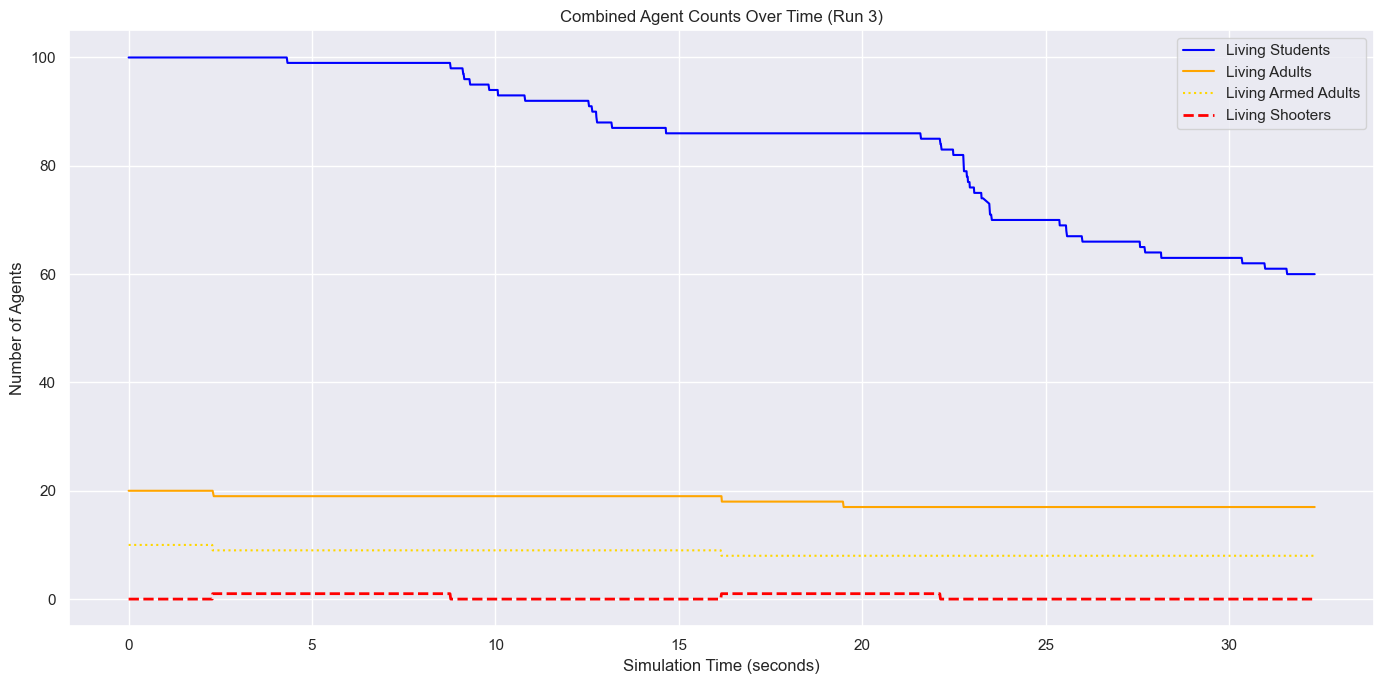


Separate Plots (Run 3):


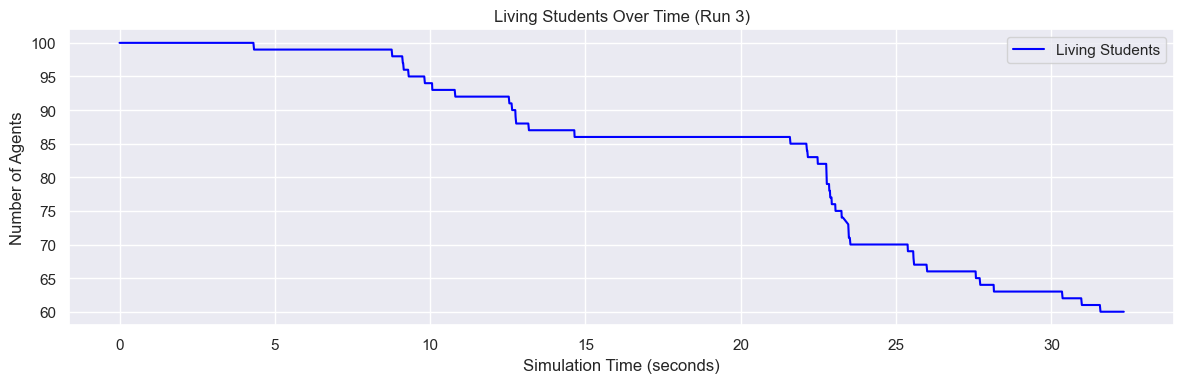

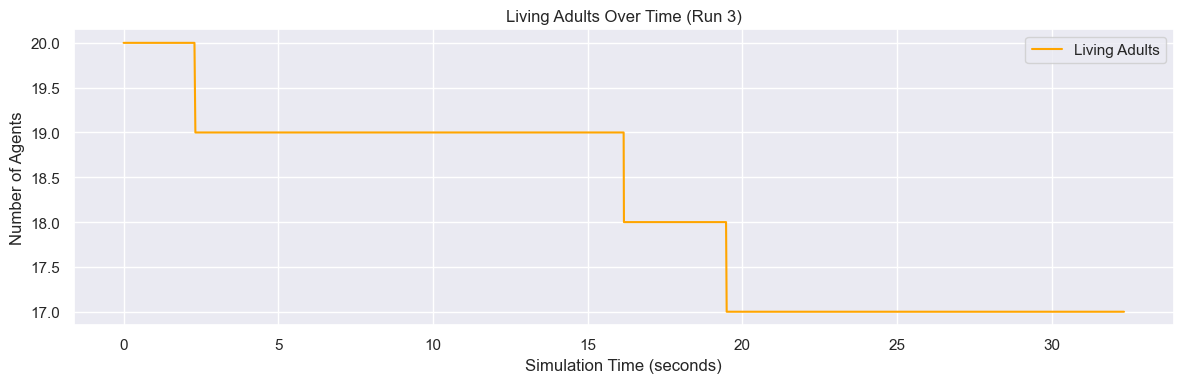

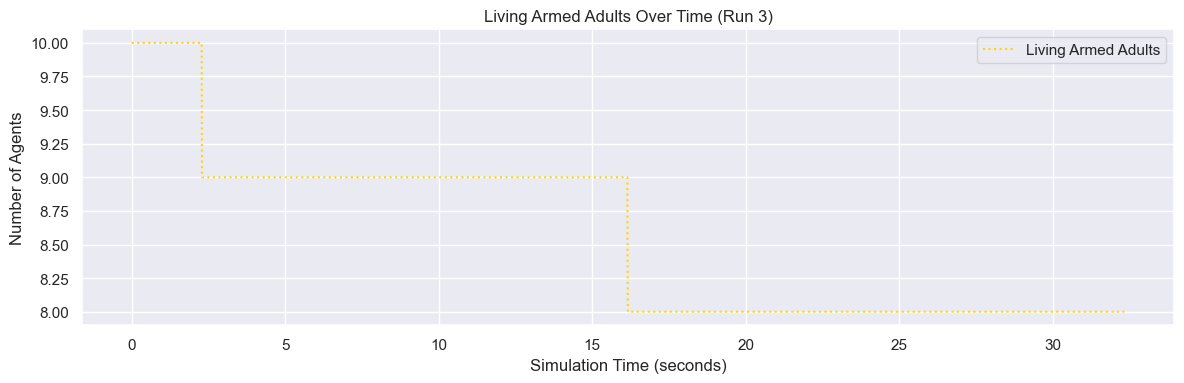

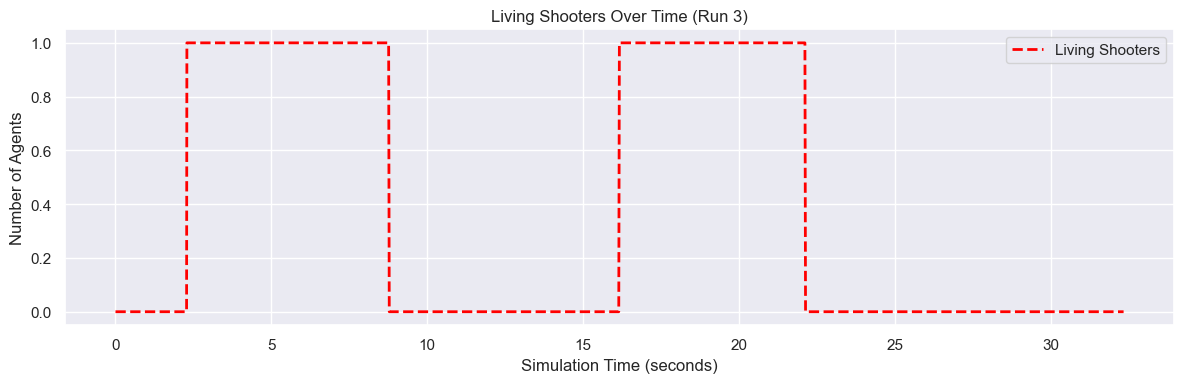

In [27]:
# Cell 3 (Revised Again): Combined AND Separate Agent Counts for Last Run

if not df.empty:
    latest_run = df['Run'].max()
    print(f"\n--- Plotting Combined and Separate Counts for Run {latest_run} ---")
    df_single_run = df[df['Run'] == latest_run]

    # --- Plot 1: COMBINED Graph ---
    print(f"\nCombined Plot (Run {latest_run}):")
    plt.figure(figsize=(14, 7)) # Make the combined plot larger

    # Plot all four lines together
    plt.plot(df_single_run['Time'], df_single_run['Living Students'], label='Living Students', color='blue')
    plt.plot(df_single_run['Time'], df_single_run['Living Adults'], label='Living Adults', color='orange')
    plt.plot(df_single_run['Time'], df_single_run['Living Armed Adults'], label='Living Armed Adults', color='gold', linestyle=':')
    plt.plot(df_single_run['Time'], df_single_run['Living Shooters'], label='Living Shooters', color='red', linestyle='--', linewidth=2)

    # Add labels and title for combined plot
    plt.xlabel("Simulation Time (seconds)")
    plt.ylabel("Number of Agents")
    plt.title(f'Combined Agent Counts Over Time (Run {latest_run})')
    plt.legend() # Show the legend for all lines
    plt.grid(True)
    plt.tight_layout()
    plt.show() # Display the combined plot

    # --- SEPARATE Graphs ---
    print(f"\nSeparate Plots (Run {latest_run}):")

    # --- Plot 2: Living Students (Separate) ---
    plt.figure(figsize=(12, 4)) # Adjust size for individual plots
    plt.plot(df_single_run['Time'], df_single_run['Living Students'], label='Living Students', color='blue')
    plt.xlabel("Simulation Time (seconds)")
    plt.ylabel("Number of Agents")
    plt.title(f'Living Students Over Time (Run {latest_run})')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show() # Show this plot

    # --- Plot 3: Living Adults (Separate) ---
    plt.figure(figsize=(12, 4))
    plt.plot(df_single_run['Time'], df_single_run['Living Adults'], label='Living Adults', color='orange')
    plt.xlabel("Simulation Time (seconds)")
    plt.ylabel("Number of Agents")
    plt.title(f'Living Adults Over Time (Run {latest_run})')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show() # Show this plot

    # --- Plot 4: Living Armed Adults (Separate) ---
    plt.figure(figsize=(12, 4))
    plt.plot(df_single_run['Time'], df_single_run['Living Armed Adults'], label='Living Armed Adults', color='gold', linestyle=':')
    plt.xlabel("Simulation Time (seconds)")
    plt.ylabel("Number of Agents")
    plt.title(f'Living Armed Adults Over Time (Run {latest_run})')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show() # Show this plot

    # --- Plot 5: Living Shooters (Separate) ---
    plt.figure(figsize=(12, 4))
    plt.plot(df_single_run['Time'], df_single_run['Living Shooters'], label='Living Shooters', color='red', linestyle='--', linewidth=2)
    plt.xlabel("Simulation Time (seconds)")
    plt.ylabel("Number of Agents")
    plt.title(f'Living Shooters Over Time (Run {latest_run})')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show() # Show this plot

else:
    print("\nSkipping single run plots as no data was loaded.")


--- Plotting Combined and Separate Casualties/Escapes for Run 3 ---

Combined Plot (Run 3):


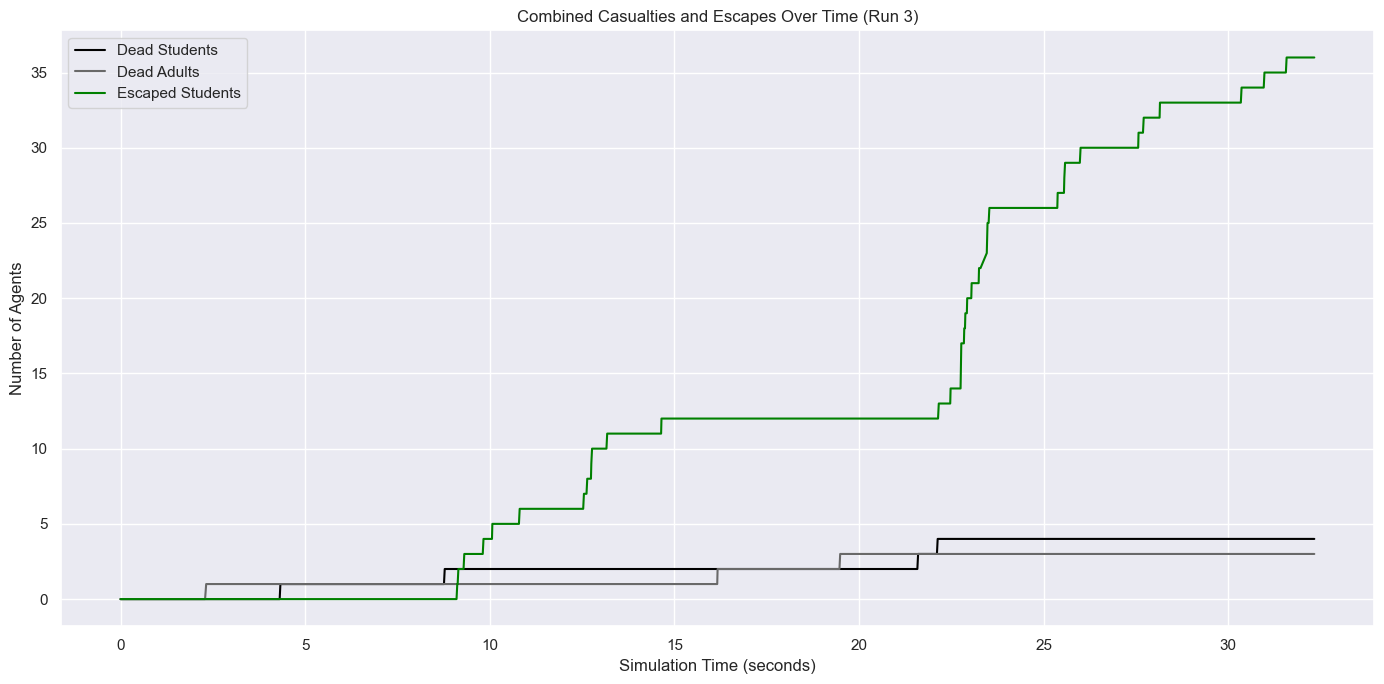


Separate Plots (Run 3):


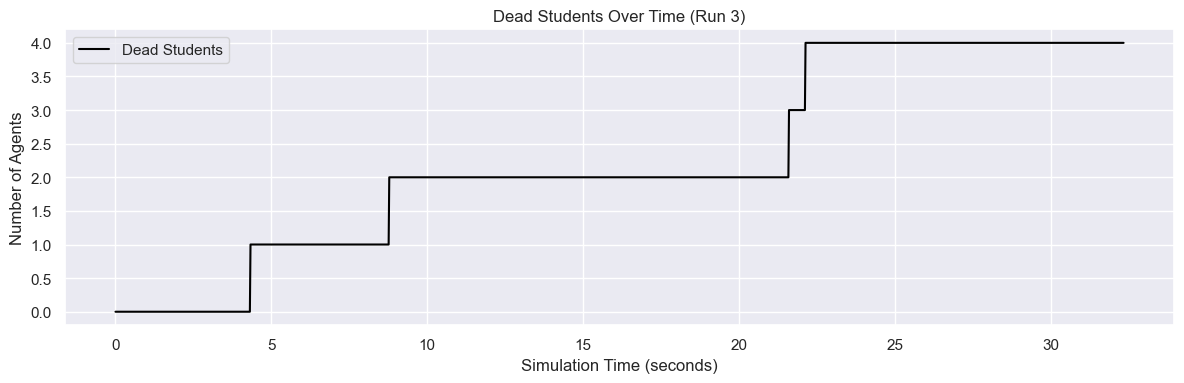

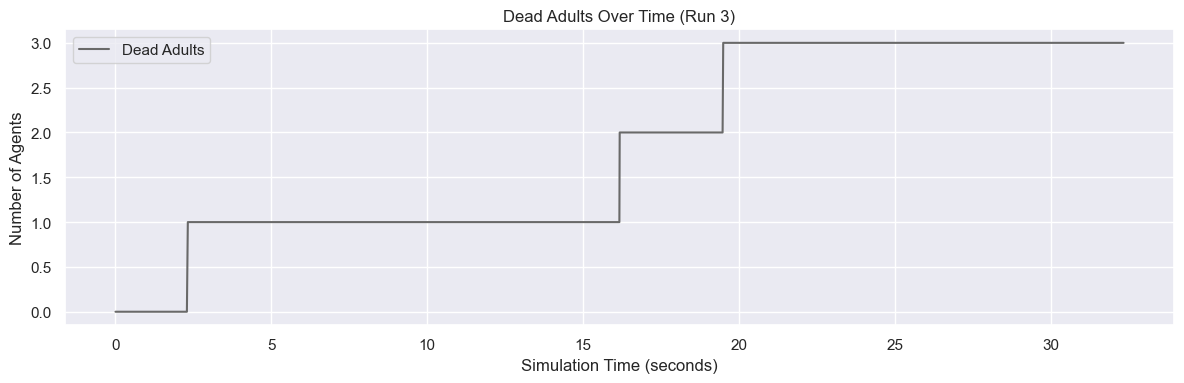

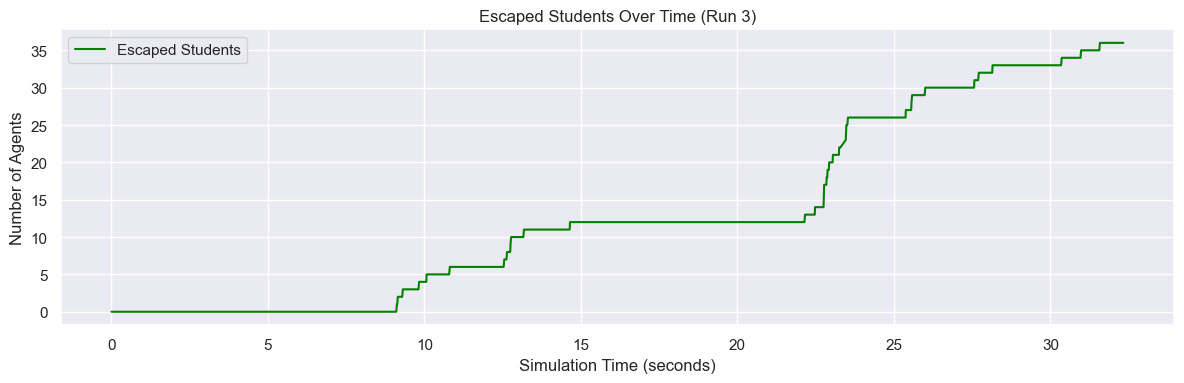

In [28]:
# Cell 4 (Revised): Combined AND Separate Casualties/Escapes for Last Run

if not df.empty:
    # Ensure df_single_run is available (it should be if Cell 3 ran, but safer to re-select)
    latest_run = df['Run'].max()
    print(f"\n--- Plotting Combined and Separate Casualties/Escapes for Run {latest_run} ---")
    df_single_run = df[df['Run'] == latest_run]

    # --- Plot 1: COMBINED Casualties & Escapes Graph ---
    print(f"\nCombined Plot (Run {latest_run}):")
    plt.figure(figsize=(14, 7)) # Make the combined plot larger

    # Plot dead and escaped counts together
    plt.plot(df_single_run['Time'], df_single_run['Dead Students'], label='Dead Students', color='black')
    plt.plot(df_single_run['Time'], df_single_run['Dead Adults'], label='Dead Adults', color='dimgray')
    plt.plot(df_single_run['Time'], df_single_run['Escaped Students'], label='Escaped Students', color='green')

    # Add labels and title for combined plot
    plt.xlabel("Simulation Time (seconds)")
    plt.ylabel("Number of Agents")
    plt.title(f'Combined Casualties and Escapes Over Time (Run {latest_run})')
    plt.legend() # Show the legend for all lines
    plt.grid(True)
    plt.tight_layout()
    plt.show() # Display the combined plot

    # --- SEPARATE Graphs ---
    print(f"\nSeparate Plots (Run {latest_run}):")

    # --- Plot 2: Dead Students (Separate) ---
    plt.figure(figsize=(12, 4)) # Adjust size for individual plots
    plt.plot(df_single_run['Time'], df_single_run['Dead Students'], label='Dead Students', color='black')
    plt.xlabel("Simulation Time (seconds)")
    plt.ylabel("Number of Agents")
    plt.title(f'Dead Students Over Time (Run {latest_run})')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show() # Show this plot

    # --- Plot 3: Dead Adults (Separate) ---
    plt.figure(figsize=(12, 4))
    plt.plot(df_single_run['Time'], df_single_run['Dead Adults'], label='Dead Adults', color='dimgray')
    plt.xlabel("Simulation Time (seconds)")
    plt.ylabel("Number of Agents")
    plt.title(f'Dead Adults Over Time (Run {latest_run})')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show() # Show this plot

    # --- Plot 4: Escaped Students (Separate) ---
    plt.figure(figsize=(12, 4))
    plt.plot(df_single_run['Time'], df_single_run['Escaped Students'], label='Escaped Students', color='green')
    plt.xlabel("Simulation Time (seconds)")
    plt.ylabel("Number of Agents")
    plt.title(f'Escaped Students Over Time (Run {latest_run})')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show() # Show this plot

else:
    print("\nSkipping casualty/escape plots as no data was loaded.")

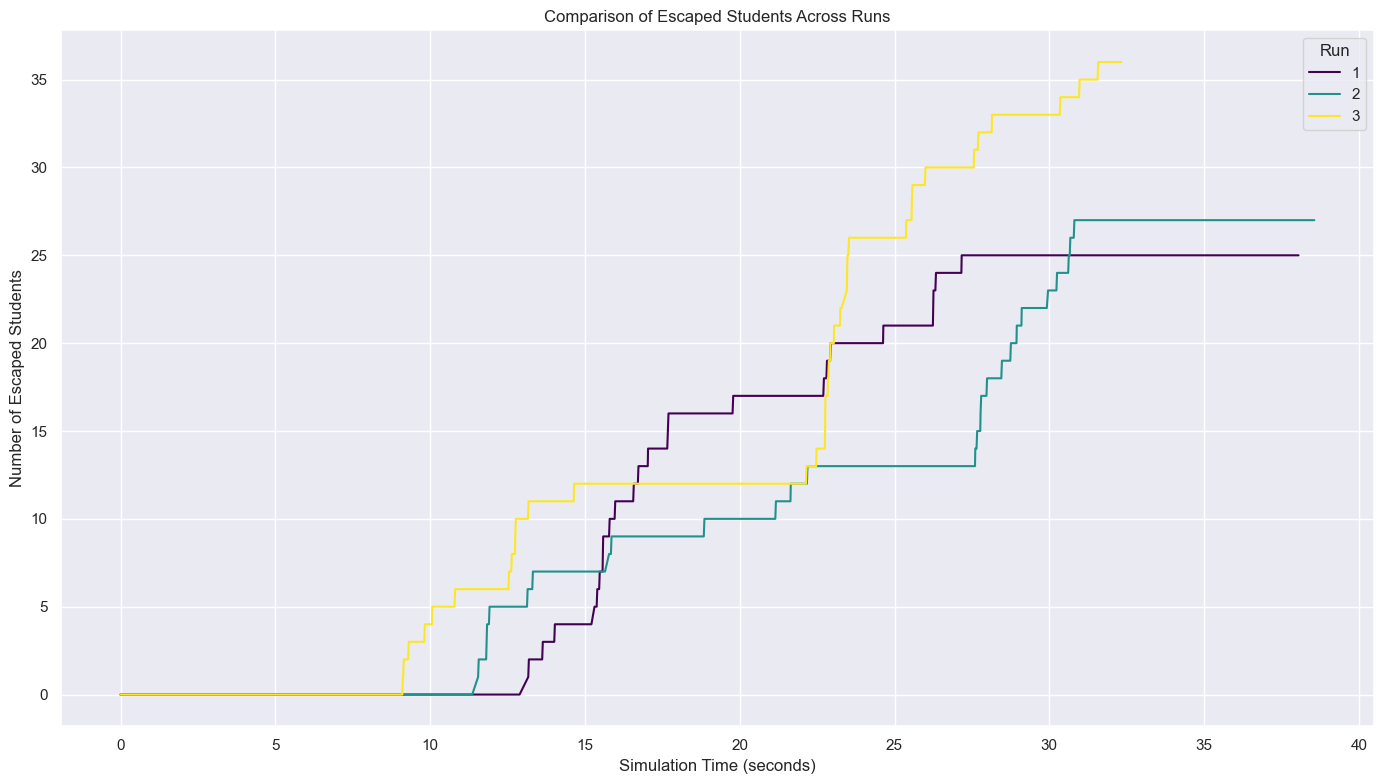

In [24]:
# Cell 5: Compare a specific metric across ALL runs
# Example: Compare the number of escaped students across different runs

if not df.empty:
    plt.figure(figsize=(14, 8))

    # Use seaborn's lineplot for easy comparison with different colors per run
    # Note: If you have many runs, this plot can become crowded.
    try:
        sns.lineplot(data=df, x='Time', y='Escaped Students', hue='Run', palette='viridis', legend='full')
        plt.title('Comparison of Escaped Students Across Runs')
        plt.xlabel("Simulation Time (seconds)")
        plt.ylabel("Number of Escaped Students")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    except ValueError as e:
        # This can happen if a column has non-numeric data unexpectedly
        print(f"Could not create comparison plot due to potential data issue: {e}")
        print("Check the 'Escaped Students' and 'Time' columns for non-numeric values.")

else:
    print("\nSkipping comparison plot as no data was loaded.")

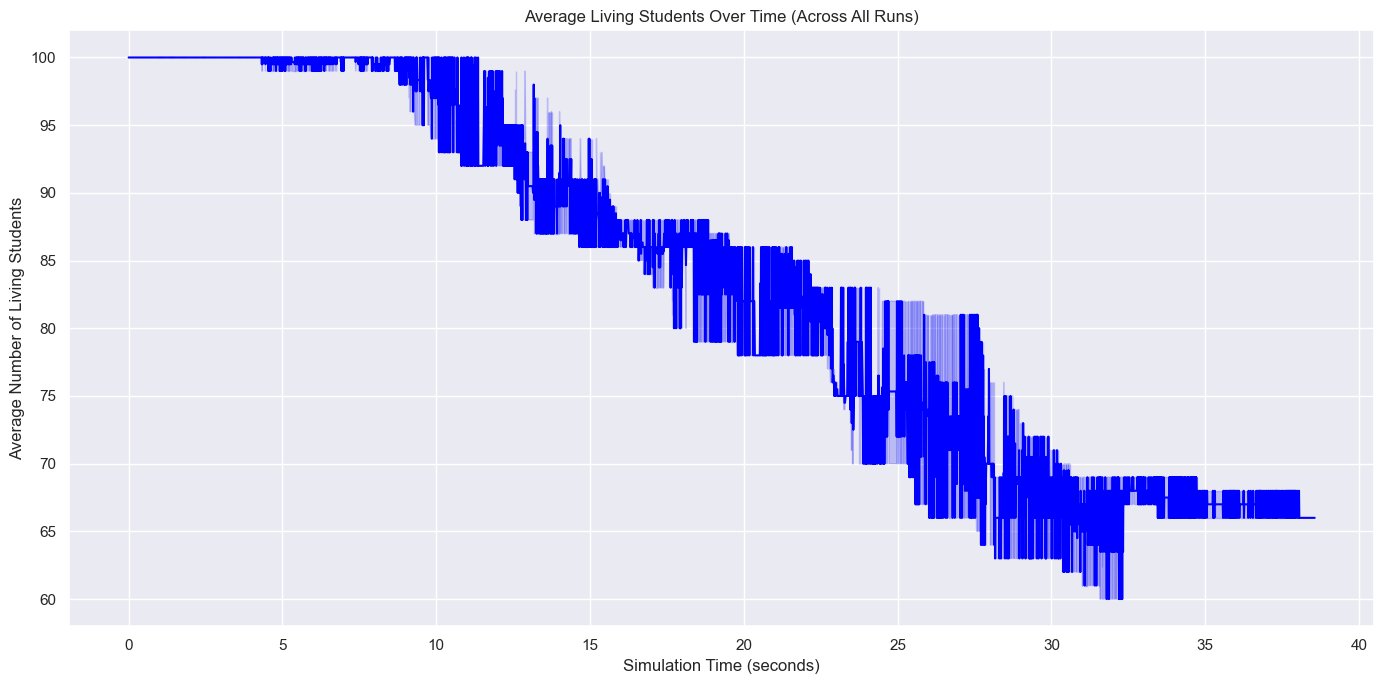

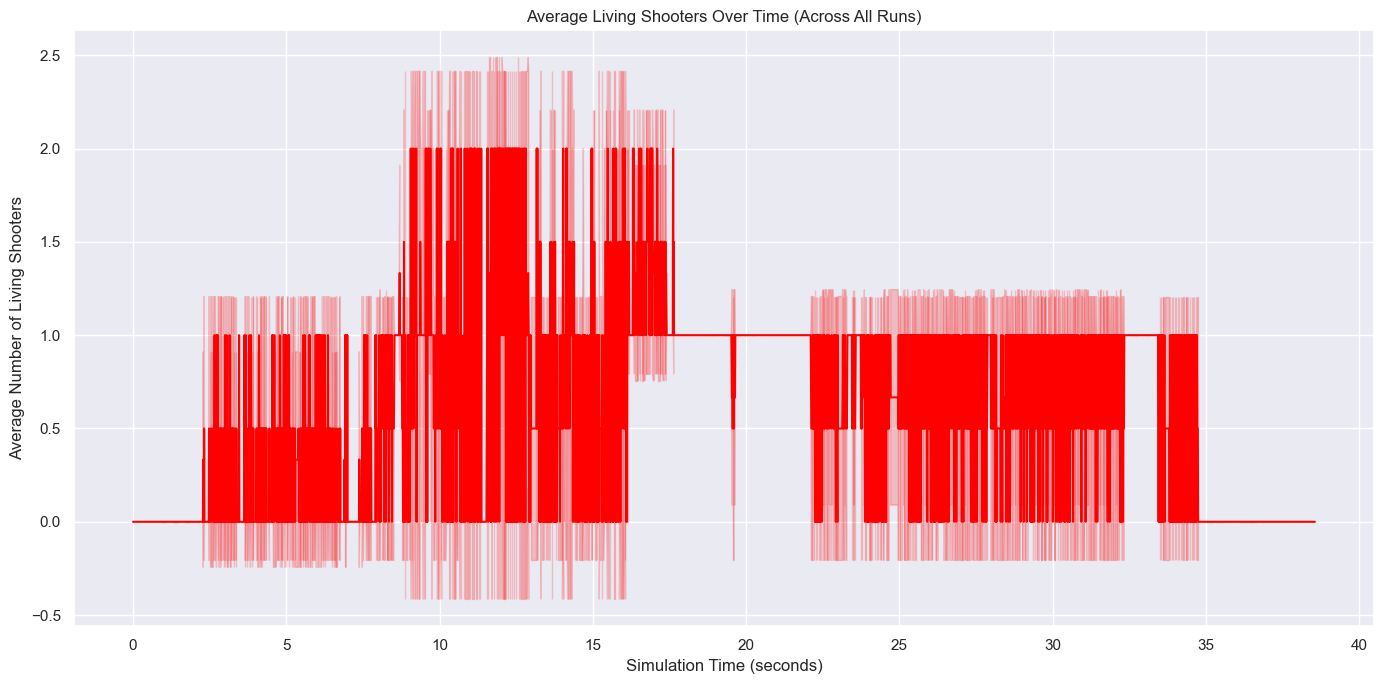

In [25]:
# Cell 6: Plot the AVERAGE of a metric across all runs
# Example: Average number of living students over time

if not df.empty:
    plt.figure(figsize=(14, 7))

    # Seaborn automatically calculates the mean and confidence interval (CI)
    sns.lineplot(data=df, x='Time', y='Living Students', color='blue', errorbar=('ci', 95)) # Shows 95% CI

    plt.title('Average Living Students Over Time (Across All Runs)')
    plt.xlabel("Simulation Time (seconds)")
    plt.ylabel("Average Number of Living Students")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Another example: Average number of living shooters
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=df, x='Time', y='Living Shooters', color='red', errorbar='sd') # Shows standard deviation band

    plt.title('Average Living Shooters Over Time (Across All Runs)')
    plt.xlabel("Simulation Time (seconds)")
    plt.ylabel("Average Number of Living Shooters")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

else:
    print("\nSkipping average plots as no data was loaded.")